In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from umap import UMAP
from sklearn.cluster import DBSCAN
from permetrics import ClusteringMetric

## Data Loading

In [11]:
df = pd.read_csv("../data/gold-features.csv")
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,file_name,energy
0,8.312640,0.013240,0.002026,0.000578,0.000059,0.000005,3.614525e-07,2.891632e-08,3.363042e-09,9.584413e-11,0.xyz,-1547.657785
1,8.903285,0.026071,0.002458,0.000283,0.000031,0.000006,1.041832e-06,4.556548e-08,2.465568e-09,8.548989e-11,1.xyz,-1552.612539
2,9.287031,0.033807,0.002167,0.000183,0.000028,0.000006,1.474569e-06,6.771517e-08,1.839670e-09,8.525103e-11,10.xyz,-1555.417784
3,8.923366,0.023786,0.001960,0.000339,0.000035,0.000007,9.650267e-07,5.893078e-08,2.394213e-09,1.202439e-10,100.xyz,-1552.217633
4,9.086140,0.026782,0.001243,0.000245,0.000049,0.000005,1.253184e-06,4.471700e-08,3.935182e-09,1.254421e-10,101.xyz,-1552.886542


In [12]:
X = df.iloc[:, :10].values
y = df["energy"].values

X.shape, y.shape

((999, 10), (999,))

## Dimension Reduction

In [59]:
# umap_fit = UMAP(n_components=2, min_dist=0.2, n_neighbors=12, random_state=21)
umap_fit = UMAP(n_components=2, min_dist=0.25, n_neighbors=15, random_state=21)
umap_data = umap_fit.fit_transform(X)

/home/ramiel/research/gold-cluster-energy-modelling/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


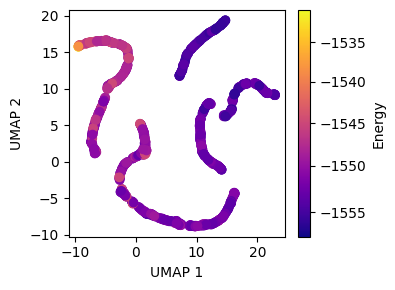

In [67]:
fig, ax = plt.subplots(figsize=(4, 3))

sc = ax.scatter(umap_data[:, 0], umap_data[:, 1], c=df["energy"], cmap="plasma", 
                norm=colors.PowerNorm(gamma=0.9))
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

fig.colorbar(sc, ax=ax, label='Energy')
fig.tight_layout()
plt.show()

## Clustering

In [61]:
dbs = DBSCAN(eps=1.3, min_samples=10)
dbs.fit(umap_data)

,eps,1.3
,min_samples,10
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [68]:
df_energy = pd.DataFrame({
    "umap_1": umap_data[:, 0],
    "umap_2": umap_data[:, 1],
    "file_name": df["file_name"],
    "energy": df["energy"],
    "cluster": dbs.labels_,
})

df_energy.head()

,umap_1,umap_2,file_name,energy,cluster
0,-2.946900,11.229852,0.xyz,-1547.657785,0
1,11.170411,1.130355,1.xyz,-1552.612539,1
2,11.053452,16.988466,10.xyz,-1555.417784,2
3,10.628563,3.068870,100.xyz,-1552.217633,1
4,19.692034,10.728635,101.xyz,-1552.886542,3


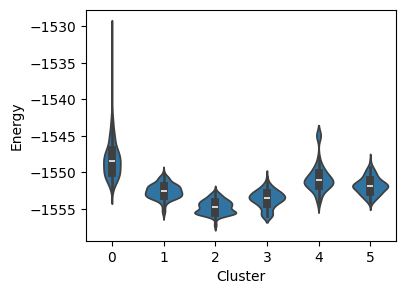

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
# sns.boxplot(df_energy, x="cluster", y="energy", ax=ax)
sns.violinplot(df_energy, x="cluster", y="energy", ax=ax)
ax.set_xlabel("Cluster")
ax.set_ylabel("Energy")
plt.show()

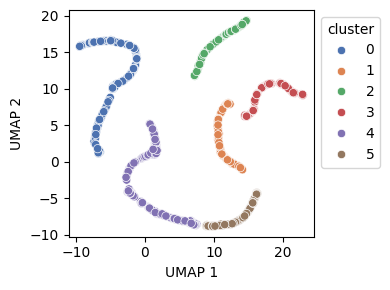

In [66]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(df_energy, x="umap_1", y="umap_2", hue="cluster", palette="deep", ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

fig.tight_layout()
plt.show()

In [70]:
evaluator = ClusteringMetric()

print(f"Silhouette score: {evaluator.silhouette_index(umap_data, dbs.labels_):.4f}")
print(f"Calinshki-Harabasz score: {evaluator.calinski_harabasz_index(umap_data, dbs.labels_):.4f}")
print(f"DBI score: {evaluator.davies_bouldin_index(umap_data, dbs.labels_):.4f}")
print(f"DBCV score: {evaluator.density_based_clustering_validation_index(umap_data, dbs.labels_):.4f}")

Silhouette score: 0.4859
Calinshki-Harabasz score: 1215.7487
DBI score: 0.6530
DBCV score: 0.9322
